<a href="https://colab.research.google.com/github/HasikaR/Audio-Denoising-Deep-Learning/blob/main/Audio_Denoising_Final(h).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/s5.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/c5.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp2')

In [ ]:
'''
with zipfile.ZipFile('/content/drive/MyDrive/s6.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp3')

'''

In [ ]:
'''
with zipfile.ZipFile('/content/drive/MyDrive/c6.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp4')
'''

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from random import seed
from random import randint
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from sklearn.metrics import mean_squared_error

#load clean signal filenames
files_path1='/tmp2/c5'
c_files=librosa.util.find_files(files_path1, ext=['wav'])

#load synthetic signal filenames
files_path2='/tmp/s5'
s_files=librosa.util.find_files(files_path2, ext=['wav'])

#create a multicolumn object with synthetic and clean signal names
c_arr=np.array(c_files)
s_arr=np.array(s_files)
samples= np.column_stack((c_arr,s_arr))
samples=np.array(samples)



In [ ]:
#split into train and test set
train_samples,val_samples = train_test_split(samples,test_size=0.2)

In [ ]:
print(val_samples)

[['/tmp2/c5/ss181_cs7_01.wav' '/tmp/s5/ss181_cs7_kd1.wav']
 ['/tmp2/c5/ss2495_cs9_035.wav' '/tmp/s5/ss2495_cs9_tci5.wav']
 ['/tmp2/c5/ss4872_cs13_012.wav' '/tmp/s5/ss4872_cs13_vc12.wav']
 ['/tmp2/c5/ss92_cs4_02.wav' '/tmp/s5/ss92_cs4_kd2.wav']
 ['/tmp2/c5/ss10390_cs47_010.wav' '/tmp/s5/ss10390_cs47_r10.wav']
 ['/tmp2/c5/ss2512_cs9_052.wav' '/tmp/s5/ss2512_cs9_tci22.wav']
 ['/tmp2/c5/ss2516_cs9_056.wav' '/tmp/s5/ss2516_cs9_tci26.wav']
 ['/tmp2/c5/ss93_cs4_03.wav' '/tmp/s5/ss93_cs4_kd3.wav']
 ['/tmp2/c5/ss120_cs4_030.wav' '/tmp/s5/ss120_cs4_kd30.wav']
 ['/tmp2/c5/ss10344_cs45_084.wav' '/tmp/s5/ss10344_cs45_r24.wav']
 ['/tmp2/c5/ss73_cs3_013.wav' '/tmp/s5/ss73_cs3_kd13.wav']
 ['/tmp2/c5/ss189_cs7_09.wav' '/tmp/s5/ss189_cs7_kd9.wav']
 ['/tmp2/c5/ss173_cs6_083.wav' '/tmp/s5/ss173_cs6_kd23.wav']
 ['/tmp2/c5/ss2515_cs9_055.wav' '/tmp/s5/ss2515_cs9_tci25.wav']
 ['/tmp2/c5/ss117_cs4_027.wav' '/tmp/s5/ss117_cs4_kd27.wav']
 ['/tmp2/c5/ss2496_cs9_036.wav' '/tmp/s5/ss2496_cs9_tci6.wav']
 ['/tmp2/c5

In [ ]:
'''
#test samples
#load clean signal filenames
files_path3='/tmp4/c6'
tc_files=librosa.util.find_files(files_path3, ext=['wav'])

#load synthetic signal filenames
files_path4='/tmp3/s6'
ts_files=librosa.util.find_files(files_path4, ext=['wav'])

#create a multicolumn object with synthetic and clean signal names
tc1_arr=np.array(tc_files)
ts1_arr=np.array(ts_files)
t_samples= np.column_stack((tc1_arr,ts1_arr))
test_samples=np.array(t_samples)
'''

In [ ]:
#number of samples in train and test set
print(len(train_samples))
#print(len(test_samples))

576


In [ ]:
#install pydub for audio slicing
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.utils import make_chunks
sig_slice = []
def audio_slicer(file_name):
    myaudio = AudioSegment.from_file(file_name , "wav") 
    chunk_length_ms = 12000 # pydub calculates in millisec
    chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec
        
    #Export all of the individual chunks as wav files
    for i, chunk in enumerate(chunks):
        chunk_name = "chunk{0}.wav".format(i)
        chunk.export(chunk_name, format="wav")
        data,sr = librosa.load(chunk_name, sr=None)
        sig_slice.append(data)
    return sig_slice

In [ ]:
def generator(samples, batch_size):
  num_samples = len(samples)
  while True:
      for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]
 
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            count = 0

            # For each example
            for _ in batch_samples:
                # Load image (X)
                i=0;
                count += 12
                syn_filename = samples[i][0]
                sliced_syn_signal = audio_slicer(syn_filename)
                        
                X_train.append(sliced_syn_signal)
                # Read label (y)
               
                clean_filename = samples[i][1]
                sliced_cln_signal = audio_slicer(syn_filename)
                y_train.append(sliced_cln_signal)
                
                if count >= batch_size:
                    # Make sure they're numpy arrays (as opposed to lists)
                    X_train = np.asarray(X_train)
                    #X_train = X_train.reshape(1,48000,1)
                    y_train = np.array(y_train)
                    #y_train = y_train.reshape(1,48000,1)
                    #print(X_train.shape)
                    #print(y_train.shape)
                    # The generator-y part: yield the next training batch            
                    yield X_train, y_train

                    #clear data 
                    X_train = []
                    y_train = []
                    count = 0

In [ ]:

#call to generator for training and test samples
train_generator = generator(train_samples, batch_size=36)
val_generator = generator(val_samples, batch_size=36)

In [ ]:
#test_generator = generator(test_samples, batch_size=36)

In [ ]:
import keras

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    
    def on_yeild(self, batch, logs={}):
      self.losses.append(logs.get('loss'))

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))


In [ ]:
import tensorflow as tf
import gc

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        keras.backend.clear_session()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed

n_epoch = 1 
# create LSTM
model = Sequential()
model.add(LSTM(16, input_shape= (None, 529200),return_sequences=True))
model.add(TimeDistributed(Dense(529200)))
model.compile(loss='mean_squared_error', optimizer='adam')
mycall = [EarlyStopping(monitor='loss', min_delta=0.001, patience=1, mode='min', verbose=1),ModelCheckpoint(filepath="/content/drive/MyDrive/weights.hdf5", monitor = 'loss', verbose=1, save_best_only=True,mode='min', save_freq = 1),MyCustomCallback(), LossHistory()]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 16)          33869888  
_________________________________________________________________
time_distributed (TimeDistri (None, None, 529200)      8996400   
Total params: 42,866,288
Trainable params: 42,866,288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_callback=model.fit(train_generator,
          steps_per_epoch =len(train_samples)//36,
          epochs = 1,
          validation_data = val_generator,
          validation_steps = len(val_samples)//36, callbacks = mycall)

 1/16 [>.............................] - ETA: 1:03 - loss: 0.0118
Epoch 00001: loss improved from inf to 0.01178, saving model to /content/drive/MyDrive/weights.hdf5
 2/16 [==>...........................] - ETA: 1:53 - loss: 0.0118
Epoch 00001: loss improved from 0.01178 to 0.01177, saving model to /content/drive/MyDrive/weights.hdf5
 3/16 [====>.........................] - ETA: 1:21 - loss: 0.0118
Epoch 00001: loss improved from 0.01177 to 0.01175, saving model to /content/drive/MyDrive/weights.hdf5
 4/16 [======>.......................] - ETA: 1:11 - loss: 0.0118
Epoch 00001: loss improved from 0.01175 to 0.01173, saving model to /content/drive/MyDrive/weights.hdf5
 5/16 [========>.....................] - ETA: 1:09 - loss: 0.0117
Epoch 00001: loss improved from 0.01173 to 0.01169, saving model to /content/drive/MyDrive/weights.hdf5
 6/16 [==========>...................] - ETA: 1:09 - loss: 0.0117
Epoch 00001: loss improved from 0.01169 to 0.01163, saving model to /content/drive/MyDri

In [ ]:
history_callback

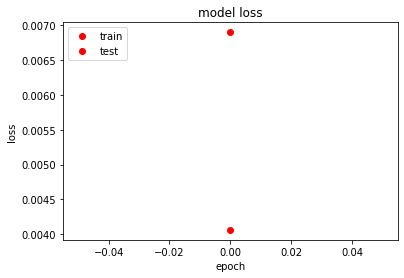

In [ ]:
plt.plot(history_callback.history['loss'],'ro')
plt.plot(history_callback.history['val_loss'],'ro')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(history_callback.history['loss'])

[0.006902376655489206]


In [ ]:
#save model to disk
from tensorflow.keras.models import save_model
model_json = model.to_json()
with open("/content/drive/MyDrive/model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("/content/drive/MyDrive/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
print(history_callback.history['loss'])

[0.010361848399043083]
